# 2. k진수에서 소수 구하기

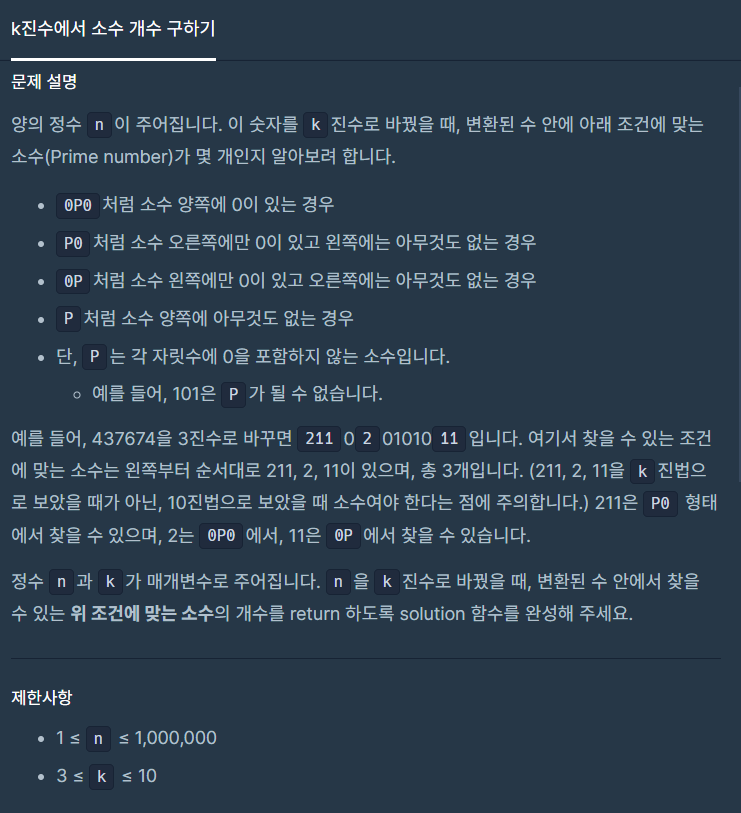

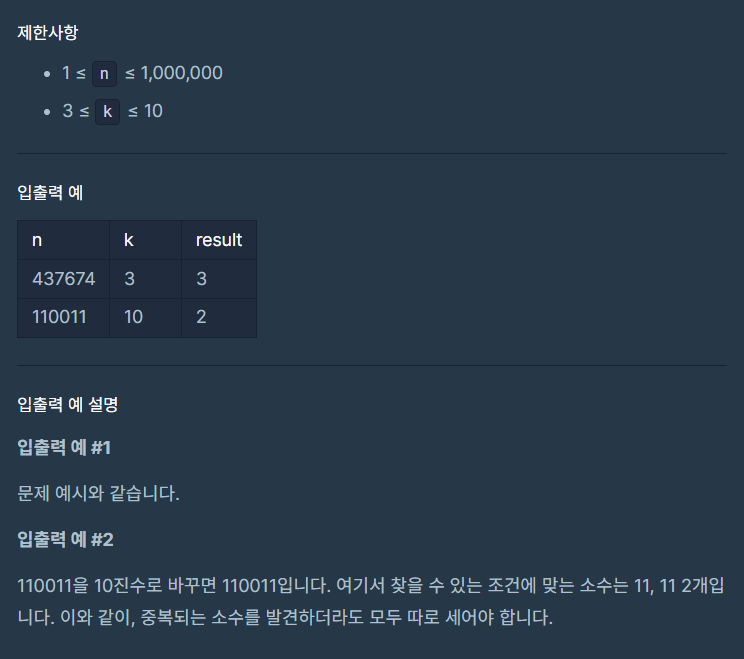

In [33]:
import math 

def convert(num, k) : 
    q, r = divmod(num, k) 
    if q : 
        return convert(q, k) + str(r)
    else : 
        return str(r)

def check(num) : 
    if num == 2 : 
        return True 
    if num == 1 or num % 2 == 0: 
        return False 
    
    for i in range(3, int(math.sqrt(num))+1, 2) : 
        if num % i == 0 : 
            return False 
    return True
        
    
def solution(n, k) : 
    numstr = str(n) if k == 10 else convert(n, k)
    nums = numstr.split('0')
    answer = 0
    for num in nums :
        if len(num) and check(int(num)) : 
            answer += 1 
    
    
    return answer

In [34]:
solution(437674, 3)

3

In [32]:
check(97)

True

# 3. 주차요금 계산

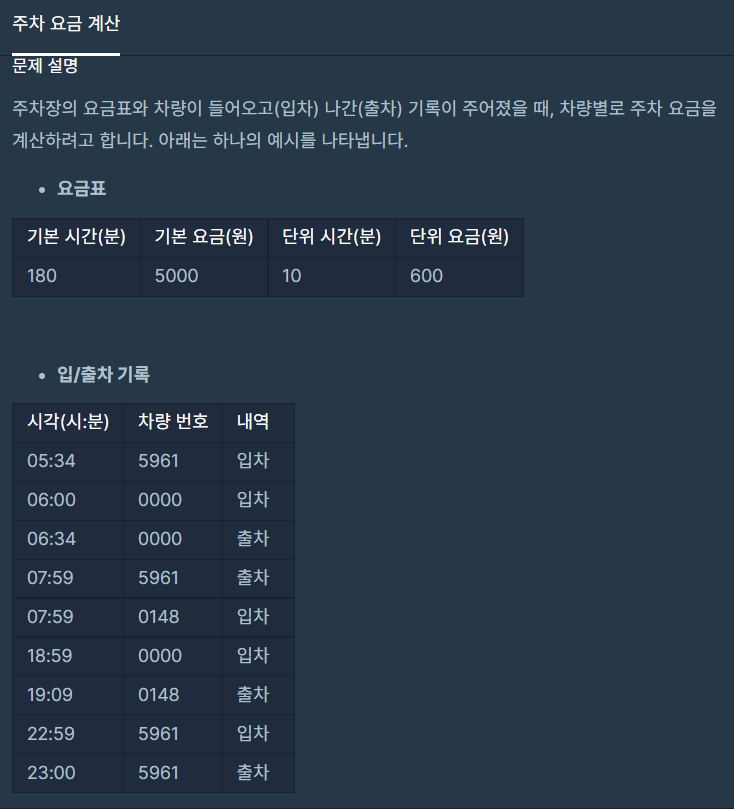

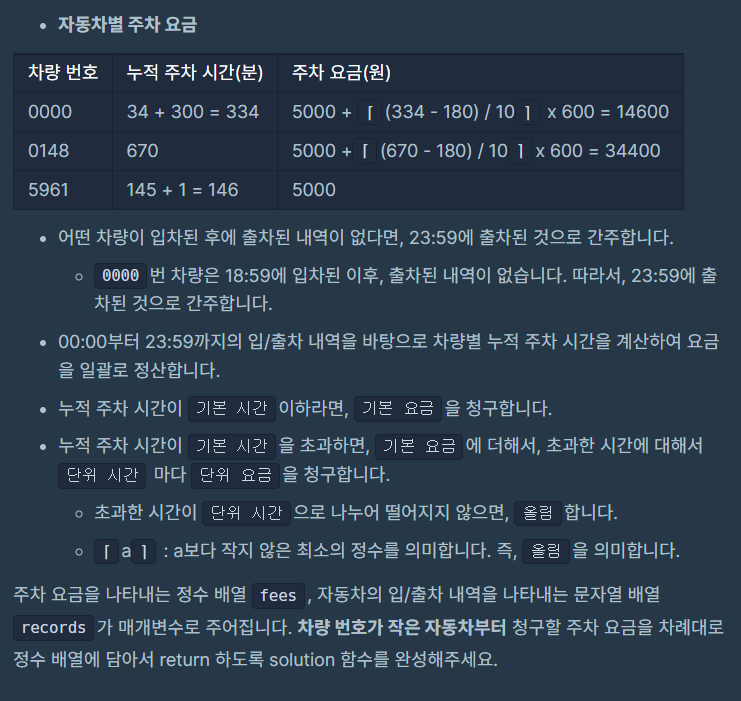

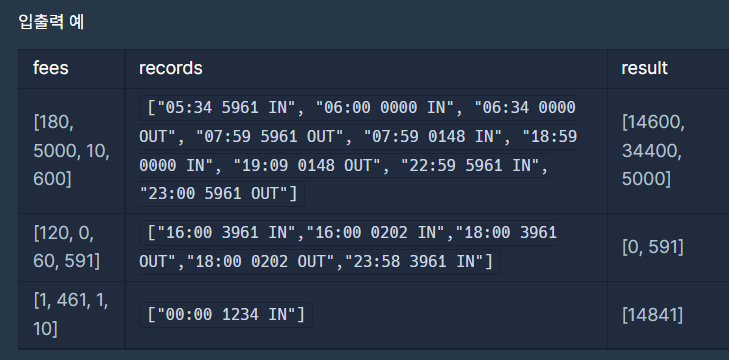

In [58]:
fees = [180, 5000, 10, 600]
records = ["05:34 5961 IN", "06:00 0000 IN", "06:34 0000 OUT", 
           "07:59 5961 OUT", "07:59 0148 IN", "18:59 0000 IN", 
           "19:09 0148 OUT", "22:59 5961 IN", "23:00 5961 OUT"]

In [102]:
import math 

def fee(lst, fees) : 
    num = lst[3]
    if lst[1] <= fees[0] : 
        return (num, fees[1])
    else : 
        f = fees[1] + math.ceil( (lst[1] - fees[0]) / fees[2] ) * fees[3] 
        return (num, f)
def solution(fees, records) : 
    cars = {} 
    for string in records : 
        t = string.split(' ')[0]
        time = int(t[:2])*60 + int(t[3:])
        car_number = string.split(' ')[1]
        inout = string.split(' ')[2]
        
        if car_number in cars : 
            if inout == 'IN' : 
                cars[car_number][0] = time
                cars[car_number][2] = inout
            
            else : 
                cars[car_number][1] += (time - cars[car_number][0])
                cars[car_number][2] = inout 
                
        else : 
            cars[car_number] = [time, 0, inout, car_number]
    
    for car in cars : 
        if cars[car][2] == 'IN' : 
            cars[car][1] += (23*60+59 - cars[car][0])
            cars[car][2] = 'OUT'
            
            
    answer = [] 
    for car in cars : 
        answer.append(fee(cars[car], fees))
    
    answer = sorted(answer)
    answer = [x[1] for x in answer]
    return answer

In [103]:
solution(fees, records)

[14600, 34400, 5000]

In [77]:
solution(fees, records)

{'5961': [1379, 146, 'OUT'],
 '0000': [1139, 334, 'IN'],
 '0148': [479, 670, 'OUT']}

In [81]:
divmod(1139, 60)

(18, 59)

## 3. 양궁 대회

In [154]:
n = 5
info = [2,1,1,1,0,0,0,0,0,0,0]

In [232]:
from itertools import combinations_with_replacement

def solution(n, info):
    answer = [0 for _ in range(11)]
    win = False
    max_num = 0   # 라이언이 이길때 가장큰 점수 차이
    # 1. 중복 조합을 이용해 라이언의 점수를 만든다.
    for res in list(combinations_with_replacement(range(0, 11), n)):
        now = [0 for _ in range(11)]
        for r in res:
            now[10 - r] += 1
        lion = 0
        peach = 0
        # 2. 라이언 점수와 어피치 점수 비교한다.
        for i, (l, p) in enumerate(zip(now, info)):
            if l == p == 0:
                continue
            if p >= l:
                peach += (10 - i)
            elif l > p:
                lion += (10 - i)
        # 3. 총 점수를 비교해 라이언이 큰 경우 결과를 업데이트 해준다.
        if lion > peach:
            win = True
            if (lion - peach) > max_num:
                max_num = lion - peach
                answer = now
    if not win:
        return [-1]
    
    return answer

In [233]:
solution(n, info)

[0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0]

In [237]:
'1*sdf'.isalnum()

False

SyntaxError: 'return' outside function (<ipython-input-238-8ce1bb1fe7c2>, line 5)